# Stroke Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stroke_1 = pd.read_csv("D1_file1.csv")
stroke_2 = pd.read_csv("D1_file2.csv")
stroke_3 = pd.read_csv("D1_file3.csv")
stroke_target = pd.read_csv("D1_target.csv")

In [3]:
stroke_1.shape, stroke_2.shape

((5110, 7), (5110, 3))

In [4]:
stroke_3.shape, stroke_target.shape

((5110, 3), (5110, 2))

# Merging Dataset

In [5]:
# checking unique values
common_lst = []

for col in stroke_1.columns:                                               # Find common columns in Inpatient and Outpatient Data
    if col in stroke_2.columns:
        common_lst.append(col)                                                  # Add the common columns in new list

print(common_lst)

['id']


In [6]:
# checking unique values
common_lst = []

for col in stroke_3.columns:                                               # Find common columns in Inpatient and Outpatient Data
    if col in stroke_target.columns:
        common_lst.append(col)                                                  # Add the common columns in new list

print(common_lst)

['id']


In [7]:
stroke_4 = pd.merge(stroke_1,stroke_2, on = "id")

In [8]:
stroke_5 = pd.merge(stroke_3,stroke_target, on = "id")

In [9]:
Stroke_total = pd.merge(stroke_4,stroke_5, on = "id")

In [10]:
Stroke_total.head()

,id,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender,age,hypertension,heart_disease,stroke
0,9046,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,0,1,1
1,51676,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,0,0,1
2,31112,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,0,1,1
3,60182,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,0,0,1
4,1665,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1,0,1


In [11]:
Stroke_total.tail()

,id,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender,age,hypertension,heart_disease,stroke
5105,18234,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,1,0,0
5106,44873,Yes,Self-employed,Urban,125.20,40.0,never smoked,Female,81.0,0,0,0
5107,19723,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0,0,0
5108,37544,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0,0,0
5109,44679,Yes,Govt_job,Urban,85.28,26.2,Unknown,Female,44.0,0,0,0


In [12]:
Stroke_total.dtypes

id                     int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
gender                object
age                  float64
hypertension           int64
heart_disease          int64
stroke                 int64
dtype: object

In [13]:
Stroke_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   ever_married       5110 non-null   object 
 2   work_type          5110 non-null   object 
 3   Residence_type     5110 non-null   object 
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                4909 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   gender             5110 non-null   object 
 8   age                5110 non-null   float64
 9   hypertension       5110 non-null   int64  
 10  heart_disease      5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 519.0+ KB


In [14]:
Stroke_total.isnull().sum()

id                     0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
gender                 0
age                    0
hypertension           0
heart_disease          0
stroke                 0
dtype: int64

**Missing Value Treatment**

In [15]:
# getting unique values from each column, so we know which values to convert to numerical
for col in Stroke_total.columns:
    print(col,Stroke_total[col].unique())

id [ 9046 51676 31112 ... 19723 37544 44679]
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
avg_glucose_level [228.69 202.21 105.92 ...  82.99 166.29  85.28]
bmi [36.6  nan 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9
 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5
 33.7 23.1 32.  29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5
 33.2 32.8 40.4 25.3 30.2 47.5 20.3 30.  28.9 28.1 31.1 21.7 27.  24.1
 45.9 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.  28.8
 34.6 19.4 30.3 41.5 22.6 56.6 27.1 31.3 31.  31.7 35.8 28.4 20.1 26.7
 38.7 34.9 25.  23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 36.9 37.3 45.7
 34.2 23.6 22.3 37.1 45.  25.5 30.8 37.4 34.5 27.9 29.5 46.  42.5 35.5
 26.9 45.5 31.5 33.  23.4 30.7 20.5 21.5 40.  28.6 42.2 29.6 35.4 16.9
 26.8 39.3 32.6 35.9 21.2 42.4 40.5 36.7 29.3 19.6 18.  17.6 19.1 50.1
 17.7 54.6 35.  22.  39.4 19.7 22.5 25.2 

In [16]:
# check frequency distribution of values class variable
Stroke_total.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [17]:
# Filling the feature 'bmi' with the median of it's values.
Stroke_total['bmi'] = Stroke_total['bmi'].fillna(Stroke_total['bmi'].mean())

In [18]:
Stroke_total.head()

,id,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender,age,hypertension,heart_disease,stroke
0,9046,Yes,Private,Urban,228.69,36.600000,formerly smoked,Male,67.0,0,1,1
1,51676,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Female,61.0,0,0,1
2,31112,Yes,Private,Rural,105.92,32.500000,never smoked,Male,80.0,0,1,1
3,60182,Yes,Private,Urban,171.23,34.400000,smokes,Female,49.0,0,0,1
4,1665,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Female,79.0,1,0,1


In [19]:
Stroke_total.describe()

,id,avg_glucose_level,bmi,age,hypertension,heart_disease,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,106.147677,28.893237,43.226614,0.097456,0.054012,0.048728
std,21161.721625,45.283560,7.698018,22.612647,0.296607,0.226063,0.215320
min,67.000000,55.120000,10.300000,0.080000,0.000000,0.000000,0.000000
25%,17741.250000,77.245000,23.800000,25.000000,0.000000,0.000000,0.000000
50%,36932.000000,91.885000,28.400000,45.000000,0.000000,0.000000,0.000000
75%,54682.000000,114.090000,32.800000,61.000000,0.000000,0.000000,0.000000
max,72940.000000,271.740000,97.600000,82.000000,1.000000,1.000000,1.000000


In [20]:
Stroke_total.dtypes

id                     int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
gender                object
age                  float64
hypertension           int64
heart_disease          int64
stroke                 int64
dtype: object

In [21]:
#to know the number of numerical and categorical features
num_data = Stroke_total.select_dtypes(exclude='object')
cat_data = Stroke_total.select_dtypes(include='object')

In [22]:
num_data

,id,avg_glucose_level,bmi,age,hypertension,heart_disease,stroke
0,9046,228.69,36.600000,67.0,0,1,1
1,51676,202.21,28.893237,61.0,0,0,1
2,31112,105.92,32.500000,80.0,0,1,1
3,60182,171.23,34.400000,49.0,0,0,1
4,1665,174.12,24.000000,79.0,1,0,1
...,...,...,...,...,...,...,...
5105,18234,83.75,28.893237,80.0,1,0,0
5106,44873,125.20,40.000000,81.0,0,0,0
5107,19723,82.99,30.600000,35.0,0,0,0
5108,37544,166.29,25.600000,51.0,0,0,0


In [23]:
cat_data

,ever_married,work_type,Residence_type,smoking_status,gender
0,Yes,Private,Urban,formerly smoked,Male
1,Yes,Self-employed,Rural,never smoked,Female
2,Yes,Private,Rural,never smoked,Male
3,Yes,Private,Urban,smokes,Female
4,Yes,Self-employed,Rural,never smoked,Female
...,...,...,...,...,...
5105,Yes,Private,Urban,never smoked,Female
5106,Yes,Self-employed,Urban,never smoked,Female
5107,Yes,Self-employed,Rural,never smoked,Female
5108,Yes,Private,Rural,formerly smoked,Male


In [24]:
Corr_b=num_data.corr()

<AxesSubplot:>

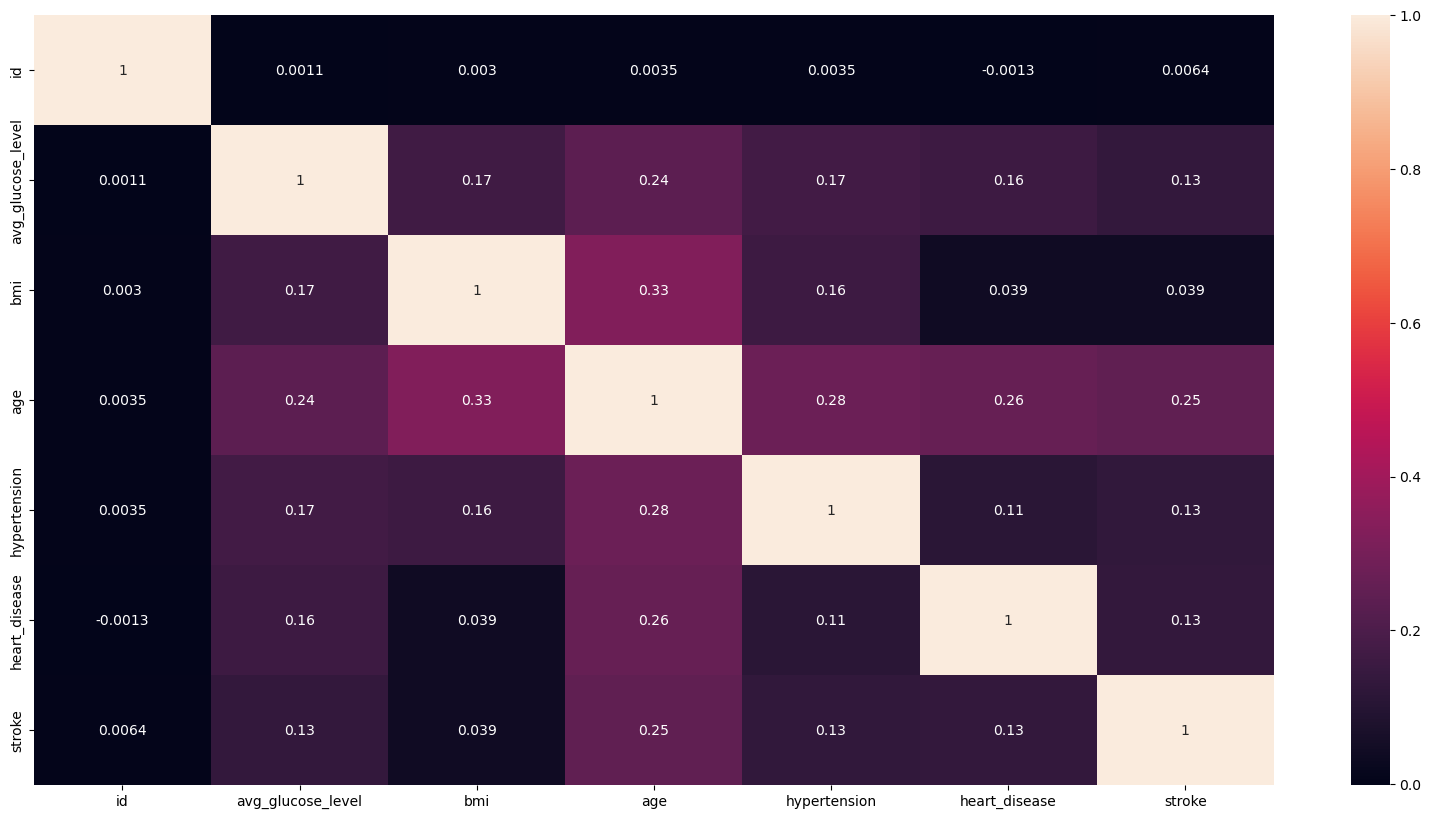

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(Corr_b,annot=True)

# Checking and Treating Outliers

<AxesSubplot:xlabel='bmi'>

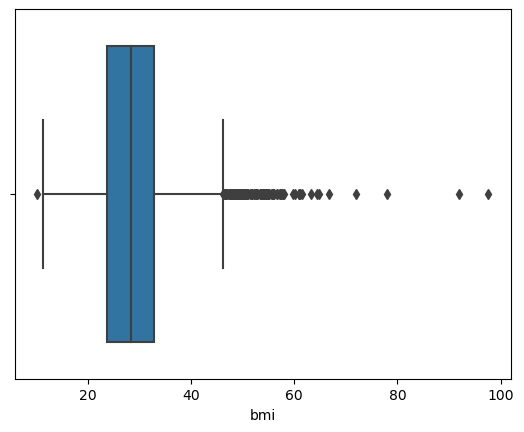

In [26]:
sns.boxplot(x=Stroke_total["bmi"])  

In [27]:
tenth_percentile=np.percentile(Stroke_total['bmi'],10)
ninetieth_percentile=np.percentile(Stroke_total['bmi'],90)
print(tenth_percentile,ninetieth_percentile)
Stroke_total['bmi']=np.where(Stroke_total['bmi']<tenth_percentile,tenth_percentile,Stroke_total['bmi']) 
Stroke_total['bmi']=np.where(Stroke_total['bmi']>ninetieth_percentile,ninetieth_percentile,Stroke_total['bmi'])

19.89 38.7


<AxesSubplot:xlabel='avg_glucose_level'>

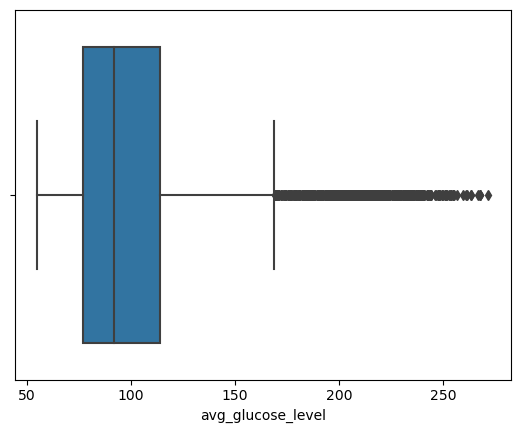

In [28]:
sns.boxplot(x=Stroke_total["avg_glucose_level"])  

In [29]:
tenth_percentile=np.percentile(Stroke_total['avg_glucose_level'],10)
ninetieth_percentile=np.percentile(Stroke_total['avg_glucose_level'],90)
print(tenth_percentile,ninetieth_percentile)
Stroke_total['avg_glucose_level']=np.where(Stroke_total['avg_glucose_level']<tenth_percentile,tenth_percentile,Stroke_total['avg_glucose_level']) 
Stroke_total['avg_glucose_level']=np.where(Stroke_total['avg_glucose_level']>ninetieth_percentile,ninetieth_percentile,Stroke_total['avg_glucose_level'])

65.789 192.18100000000007


In [30]:
#drop the columns
Stroke_total.drop(['bmi'], axis=1, inplace = True)

In [31]:
Stroke_total.dtypes

id                     int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
smoking_status        object
gender                object
age                  float64
hypertension           int64
heart_disease          int64
stroke                 int64
dtype: object

# Get_dummies Method

In [32]:
#categorical columns converting using get_dummies
Stroke_total = pd.get_dummies(Stroke_total, columns=['ever_married','work_type','Residence_type','smoking_status','gender'])

In [33]:
Stroke_total.head()

,id,avg_glucose_level,age,hypertension,heart_disease,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,9046,192.181,67.0,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,51676,192.181,61.0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,105.920,80.0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,60182,171.230,49.0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1665,174.120,79.0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [34]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Train_Test_split

In [35]:
X = Stroke_total.drop(['stroke'], axis=1)
y = Stroke_total['stroke']

In [36]:
# Split the data into training and testing sets
train = Stroke_total.sample(frac=0.8, random_state=42)
test = Stroke_total.drop(train.index)

In [37]:
# Split the training and testing data into features and labels
X_train = train.drop(['id', 'stroke'], axis=1).values
y_train = train['stroke'].values
X_test = test.drop(['id', 'stroke'], axis=1).values
y_test = test['stroke'].values

In [38]:
# create an instance of the StandardScaler
scaler = StandardScaler()

# fit the scaler to your data
scaler.fit(X_train)

# transform your data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes Algorithm before balancing the data

In [39]:
class NaiveBayes:
    def __init__(self):
        self.prior_probs = {}
        self.likelihood_probs = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        # Compute prior probabilities
        for c in self.classes:
            self.prior_probs[c] = np.sum(y == c) / n_samples

        # Compute likelihood probabilities
        for c in self.classes:
            X_c = X[y == c]
            self.likelihood_probs[c] = (X_c.sum(axis=0) + 1) / (np.sum(X_c) + n_features)

    def predict(self, X):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.prior_probs[c])
            likelihood = np.log(self.likelihood_probs[c])
            posterior = np.sum(likelihood * X, axis=1) + prior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors, axis=0)]
    
def accuracy_score(y_true, y_pred):
        
        accuracy = np.sum(y_true == y_pred)/len(y_true) *100
        return accuracy

In [40]:
nb = NaiveBayes()
nb.fit(X_train_scaled,y_train)
predictions = nb.predict(X_test_scaled)
#predictions=predictions.reshape(-1,1)
print("Naive Bayes classification accuracy ",accuracy_score(y_test,predictions))

Naive Bayes classification accuracy  95.79256360078277


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_13276\3642960138.py:23: RuntimeWarning: invalid value encountered in log
  likelihood = np.log(self.likelihood_probs[c])


# Hyperparameter tuning

In [41]:
def cross_val_score(nb, X, y, k=5):
    scores = []
    n = len(y)
    idx = np.arange(n)
    np.random.shuffle(idx)
    for i in range(k):
        test_idx = idx[int(i * n / k):int((i + 1) * n / k)]
        train_idx = np.concatenate([idx[:int(i * n / k)], idx[int((i + 1) * n / k):]])
        X_train_scaled, y_train = X[train_idx], y[train_idx]
        X_test_scaled, y_test = X[test_idx], y[test_idx]
        nb.fit(X_train_scaled, y_train)
        y_pred = nb.predict(X_test_scaled)
        scores.append(accuracy_score(y_test, y_pred))
    return np.mean(scores)

In [42]:
best_score = 0
best_alpha = None

for alpha in [0.1, 0.01, 0.001]:
    nb = NaiveBayes()
    scores = cross_val_score(nb, X_train_scaled, y_train, k=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

# Train and evaluate the model with the best hyperparameters
nb.fit(X_train_scaled, y_train)
y_pred = nb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"best_alpha: {best_alpha}")
print(f"best_score: {best_score}")

Accuracy: 95.79256360078277
best_alpha: 0.001
best_score: 94.96105077614148


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_13276\3642960138.py:23: RuntimeWarning: invalid value encountered in log
  likelihood = np.log(self.likelihood_probs[c])


In [ ]:
------------------------------------------------

# Naive Bayes Algorithm after balancing

Separating the class by 0 and 1

In [43]:
# stroke count
stroke_count_0, stroke_count_1 = Stroke_total['stroke'].value_counts()

# Separate class
stroke_0 = Stroke_total[Stroke_total['stroke'] == 0]
stroke_1 = Stroke_total[Stroke_total['stroke'] == 1]# print the shape of the class
print('stroke 0:', stroke_0.shape)
print('stroke 1:', stroke_1.shape)

stroke 0: (4861, 22)
stroke 1: (249, 22)


**Undersampling**

In [44]:
"""stroke_0_under = stroke_0.sample(stroke_count_1)

test_under = pd.concat([stroke_0_under, stroke_1], axis=0)

print("total stroke of 1 and0:",test_under['stroke'].value_counts())# plot the count after under-sampeling
test_under['stroke'].value_counts().plot(kind='bar', title='count (target)')"""

'stroke_0_under = stroke_0.sample(stroke_count_1)\n\ntest_under = pd.concat([stroke_0_under, stroke_1], axis=0)\n\nprint("total stroke of 1 and0:",test_under[\'stroke\'].value_counts())# plot the count after under-sampeling\ntest_under[\'stroke\'].value_counts().plot(kind=\'bar\', title=\'count (target)\')'

In [45]:
import imblearn

In [48]:
from collections import Counter

In [49]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 4861, 1: 249})
Resample dataset shape Counter({0: 249, 1: 249})


In [ ]:
# Split the data into training and testing sets
train = Stroke_total.sample(frac=0.8, random_state=42)
test = Stroke_total.drop(train.index)

In [ ]:
# Split the training and testing data into features and labels
X_train = train.drop(['id', 'stroke'], axis=1).values
y_train = train['stroke'].values
X_test = test.drop(['id', 'stroke'], axis=1).values
y_test = test['stroke'].values